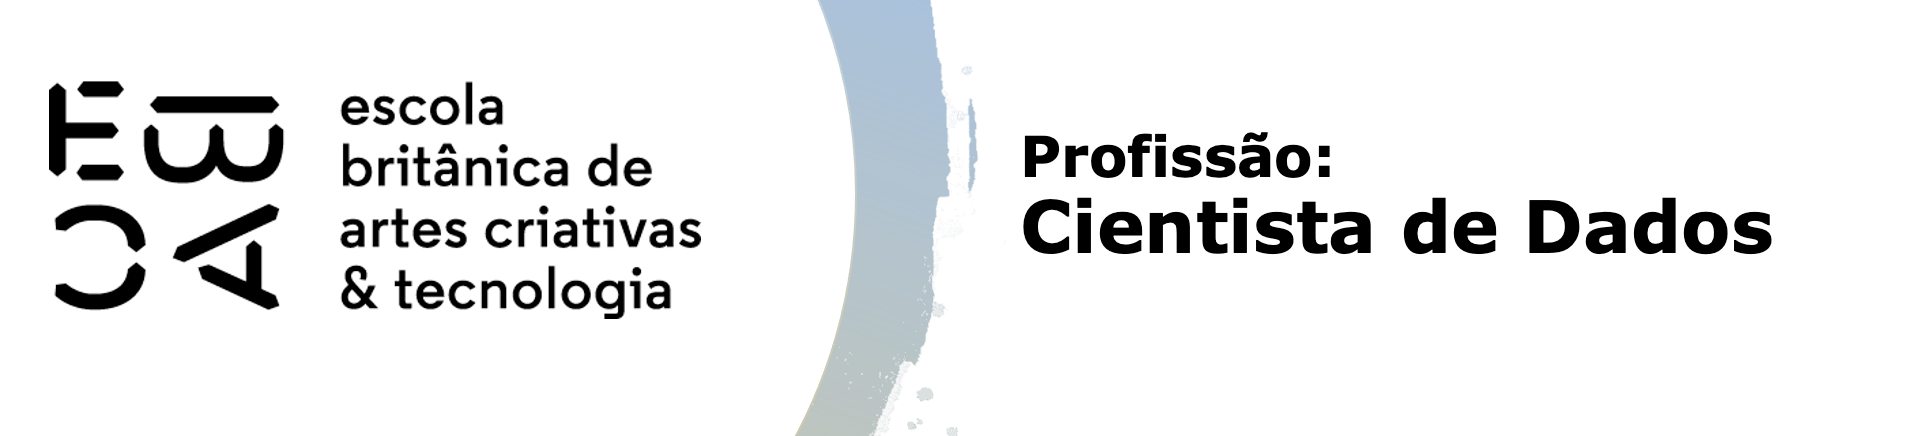

# Probabilidade - Tarefa

In [42]:
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

1. Uma máquina embala ração para cachorro em pacotes de 15 kg, mas cada pacote produzido acaba tendo um peso aleatório, com distribuição Normal, com média 15kg, mas com desvio padrão 0,1 kg. Obtenha a probabilidade de que um pacote selecionado aleatoriamente dessa produção tenha mais que 15,2 kg.

In [43]:
# Definindo os Parâmetros da distribuição normal
media = 15  # média em kg
des_pad = 0.1  # desvio padrão em kg

# limite superior (15,2 kg)
lim_sup = 15.2

# Probabilidade com a "função de distribuição acumulativa" - CDF
prob = 1 - stats.norm.cdf(x=lim_sup, loc=media, scale=des_pad)
print(f'A probabilidade da embalagem ter mais que 15,2 kg é de = {prob*100:.2f}%'.replace('.', ','))

A probabilidade da embalagem ter mais que 15,2 kg é de = 2,28%


2. Da máquina descrita acima, obtenha o percentil de ordem 95% para o peso dos pacotes. Ou seja, o valor tal que a probabilidade de um pacote ter peso menor que este seja de 95%.

In [44]:
# Percentil 95% ('norm.ppf' é o inverso de 'norm.cdf')
# .cdf()função calcula a probabilidade para um determinado valor de distribuição normal
# .ppf()função calcula o valor de distribuição normal para uma determinada probabilidade é o valor necessário.
percentil = stats.norm.ppf(q=0.95, loc=media, scale=des_pad)
print(f'Percentil de ordem 95% para o peso dos pacotes = {percentil:.2f} kg'.replace('.', ','))

Percentil de ordem 95% para o peso dos pacotes = 15,16 kg


3. Suponha duas variáveis aleatórias $Y_1$ e $Y_2$, a primeira com distribuição Normal Padrão (média=0, variância=1), a segunda com distribuição *t-studdent* com 5 graus de liberdade (também padrão). Calcule, para cada uma, a probabilidade de ser menor que cada um dos valores contidos no objeto $Y$ na célula abaixo:

In [45]:
# Y Valor
Y=np.linspace(-6, 6, 200)

# Definição params Y1 distribuição normal padrão
media = 0
variancia = 1
desvio_padrao = math.sqrt(variancia)

# Definição params Y2 t-student, 5 graus de liberdade
graus_de_liberdade = 5


# Cálculo de probabilidade de Y1 ser menor que cada valor em Y
Y1 = stats.norm.cdf(x=Y, loc=media, scale=desvio_padrao)

# Cálculo de probabilidade de Y2 ser menor que cada valor em Y
Y2 = stats.t.cdf(x=Y, df=graus_de_liberdade)


# DF
df = pd.DataFrame({'<= Y':map(lambda x: round(x,2), Y), 
                   'Y1':map(lambda x: f'{round(x*100, 2)}%', Y1), 
                   'Y2':map(lambda x: f'{round(x*100, 2)}%', Y2)})
df.head()

,<= Y,Y1,Y2
0,-6.00,0.0%,0.09%
1,-5.94,0.0%,0.1%
2,-5.88,0.0%,0.1%
3,-5.82,0.0%,0.11%
4,-5.76,0.0%,0.11%


4. Faça uma visualização gráfica dos dados do item anterior.

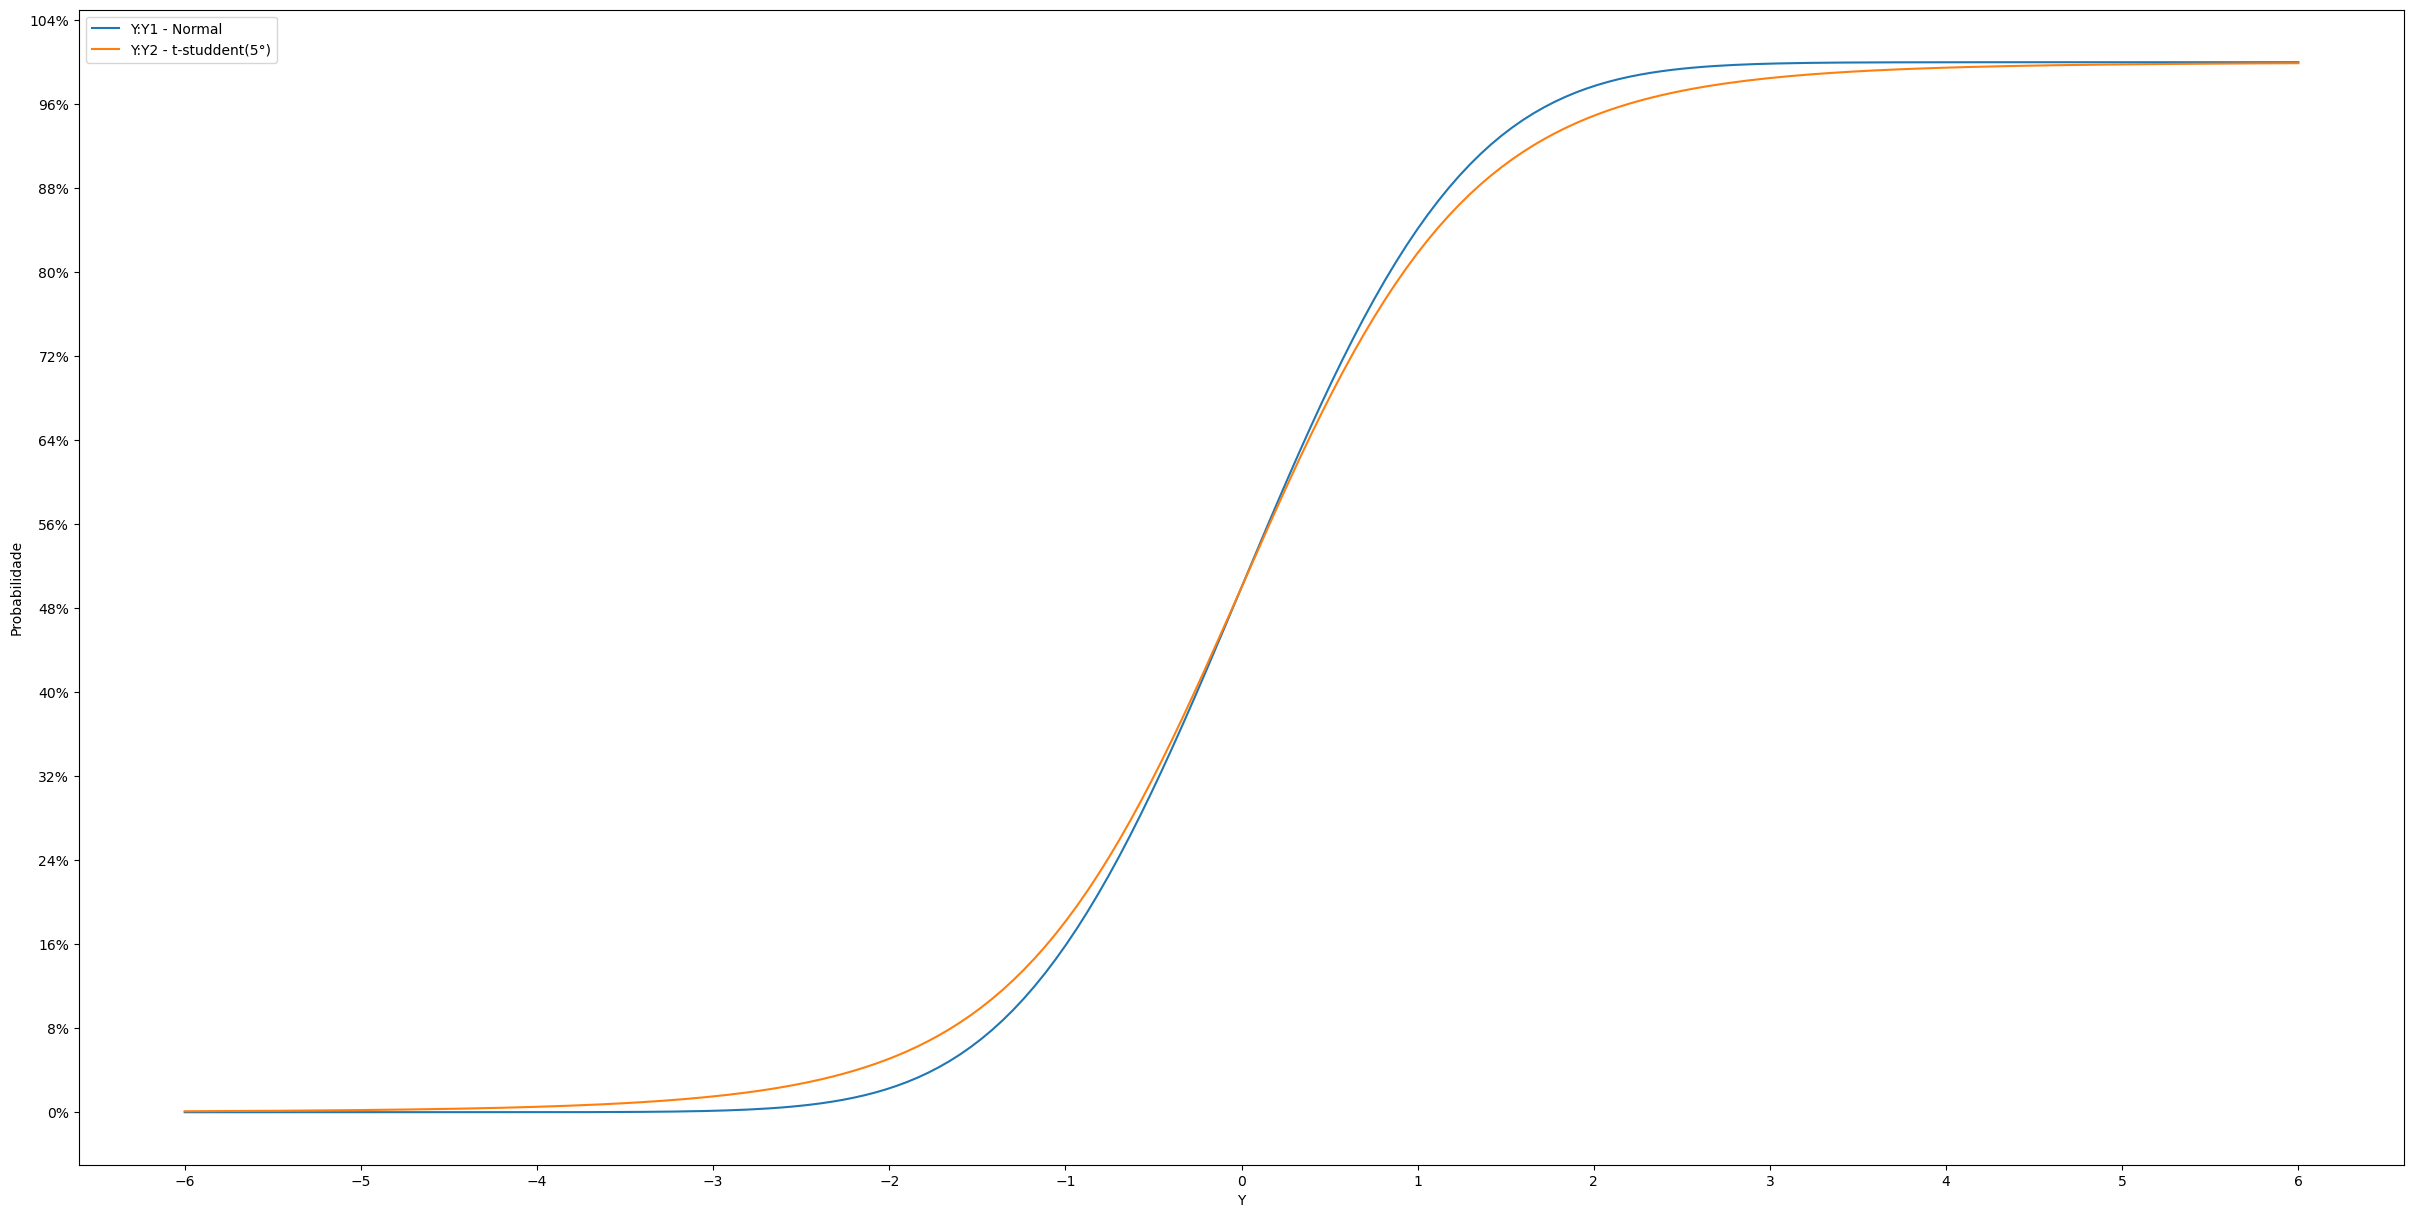

In [46]:
fig, ax = plt.subplots(figsize=(30, 15))

# Legenda
ax.plot(Y, Y1, label='Y:Y1 - Normal')
ax.plot(Y, Y2, label='Y:Y2 - t-studdent(5°)')

# Marcadores em x e y
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.yaxis.set_major_locator(plt.MaxNLocator(15))

# Formatação do eixo y em formato percentual
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

# Eixo x 
ax.set_xlabel('Y')
# Eixo y 
ax.set_ylabel('Probabilidade')

ax.legend()
plt.show()

5. 3. Suponha duas variáveis aleatórias $Y_1$ e $Y_2$, a primeira com distribuição Normal Padrão (média=0, variância=1), a segunda com distribuição *t-studdent* com 5 graus de liberdade (também padrão). Calcule, para cada uma, o percentil (a inversa da *CDF*) para cada um dos valores do objeto *P* abaixo:

In [47]:
Y=np.linspace(0, 1, 20)

# Definição params Y1 distribuição normal padrão
media = 0
variancia = 1
desvio_padrao = math.sqrt(variancia)

# Definição params Y2 t-student, 5 graus de liberdade
graus_de_liberdade = 5


# Cálculo do percentil de Y1 a cada valor de Y
Y1 = stats.norm.ppf(q=Y, loc=media, scale=desvio_padrao)

# Cálculo do percentil de Y2 a cada valor de Y
Y2 = stats.t.ppf(q=Y, df=graus_de_liberdade)

# Exibe o DataFrame com os resultados
df = pd.DataFrame({'Y':map(lambda x: round(x, 2), Y), 
                   'Y1':map(lambda x: round(x, 2), Y1), 
                   'Y2':map(lambda x: round(x, 2), Y2)})
df.head()

,Y,Y1,Y2
0,0.00,-inf,-inf
1,0.05,-1.62,-1.97
2,0.11,-1.25,-1.44
3,0.16,-1.00,-1.11
4,0.21,-0.80,-0.88


6. Faça um gráfico com os dados do item anterior.

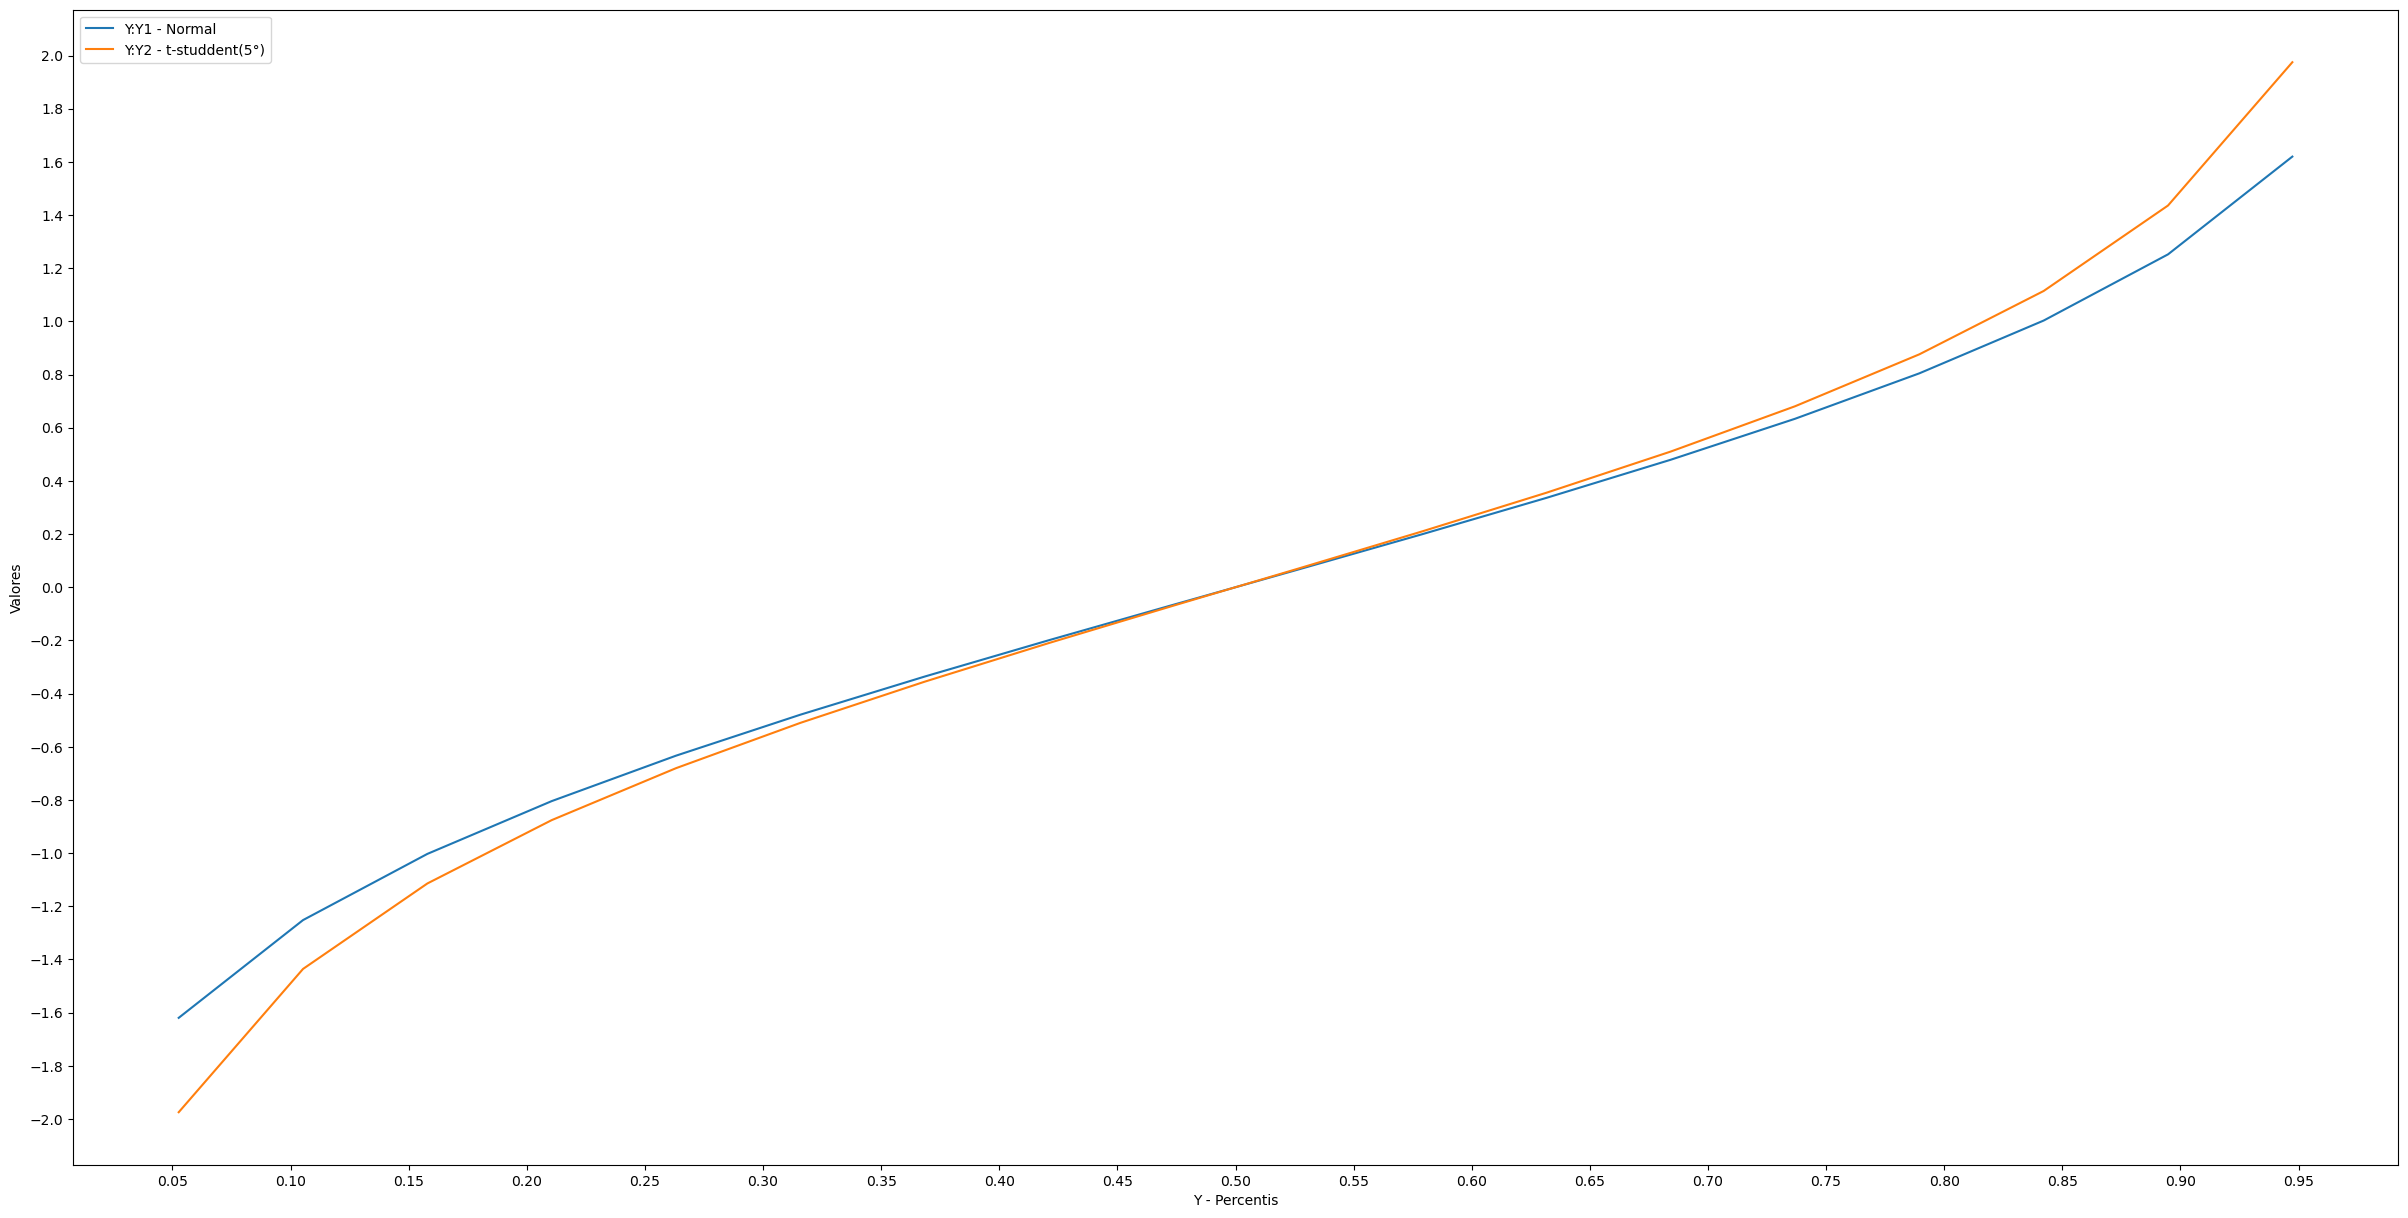

In [48]:
fig, ax = plt.subplots(figsize=(30, 15))

# Legenda
ax.plot(Y, Y1, label='Y:Y1 - Normal')
ax.plot(Y, Y2, label='Y:Y2 - t-studdent(5°)')

# Marcadores em x e y
ax.xaxis.set_major_locator(plt.MaxNLocator(22))
ax.yaxis.set_major_locator(plt.MaxNLocator(22))

# Eixo x 
ax.set_xlabel('Y - Percentis')
# Eixo y 
ax.set_ylabel('Valores')

ax.legend()
plt.show()